# Step 1: Set Up Your Environment
- Langugage: Python
- Code Editor: vs code

# Step 2: Gather Your Documents:
I have collected four documents related to the history of Pakistan. It contains some common keywords such as Pakistan, country, people, services, organisations, modern, transportation, goods, and history

# Step 3: Create a Query Function

In [15]:
def query_function():
    return input("Enter Keyword:")

# Step 4: Implement Keyword Matching
I have created a keyword matching function by creating
- set of words in document. 
- set of query.

Then i took a intersection between these two sets which provides me the count of matched keywords in a documents. After that i ranked them on the most keyword matched score.

In [16]:
import re

def create_indexer(words):
    indexer = {}

    for word in words:
        if word in indexer:
            indexer[word] +=  1
        else:
            indexer[word] = 1
            
    return indexer

def keyword_match(query, documents):
    query = query.lower()
    doc_scores = []
    for i, doc in enumerate(documents):
        words = re.findall(r'\b\w+\b', doc.lower())
        indexer = create_indexer(words)
        query_exists = query in indexer
        score = indexer[query] if query_exists else 0
        doc_scores.append((f"Doc {i+1}.txt", score ))
        ranked_docs = sorted(doc_scores, key=lambda x: x[1], reverse=True)
    return ranked_docs

In [17]:
def read_document(path):
    file = open(path, 'r')
    content = file.read()
    return content

In [18]:
doc1 = read_document("./Documents_02/Doc 1.txt")
doc2 = read_document("./Documents_02/Doc 2.txt")
doc3 = read_document("./Documents_02/Doc 3.txt")
doc4 = read_document("./Documents_02/Doc 4.txt")

# Step 6: Display the Ranked Documents

In [19]:
documents = [doc1, doc2, doc3, doc4]
# query = query_function()
query = "Pakistan"
print(f"Pakistan: {keyword_match(query, documents)}")
query = "country"
print(f"country: {keyword_match(query, documents)}")
query = "people"
print(f"people: {keyword_match(query, documents)}")
query = "services"
print(f"services: {keyword_match(query, documents)}")
query = "services"
print(f"services: {keyword_match(query, documents)}")
query = "organisations"
print(f"organisations: {keyword_match(query, documents)}")
query = "modern"
print(f"modern: {keyword_match(query, documents)}")
query = "transportation"
print(f"transportation: {keyword_match(query, documents)}")
query = "goods"
print(f"goods: {keyword_match(query, documents)}")
query = "history"
print(f"history: {keyword_match(query, documents)}")

Pakistan: [('Doc 1.txt', 3), ('Doc 2.txt', 2), ('Doc 3.txt', 2), ('Doc 4.txt', 1)]
country: [('Doc 2.txt', 3), ('Doc 1.txt', 2), ('Doc 3.txt', 2), ('Doc 4.txt', 1)]
people: [('Doc 1.txt', 2), ('Doc 4.txt', 2), ('Doc 2.txt', 1), ('Doc 3.txt', 0)]
services: [('Doc 4.txt', 3), ('Doc 2.txt', 1), ('Doc 1.txt', 0), ('Doc 3.txt', 0)]
services: [('Doc 4.txt', 3), ('Doc 2.txt', 1), ('Doc 1.txt', 0), ('Doc 3.txt', 0)]
organisations: [('Doc 3.txt', 2), ('Doc 1.txt', 0), ('Doc 2.txt', 0), ('Doc 4.txt', 0)]
modern: [('Doc 2.txt', 1), ('Doc 1.txt', 0), ('Doc 3.txt', 0), ('Doc 4.txt', 0)]
transportation: [('Doc 2.txt', 1), ('Doc 1.txt', 0), ('Doc 3.txt', 0), ('Doc 4.txt', 0)]
goods: [('Doc 4.txt', 3), ('Doc 1.txt', 0), ('Doc 2.txt', 0), ('Doc 3.txt', 0)]
history: [('Doc 2.txt', 1), ('Doc 1.txt', 0), ('Doc 3.txt', 0), ('Doc 4.txt', 0)]


# Step 5: Implement TF-IDF Scoring (Optional)
TF stands for Term Frequency: It is the count of a particular word in a document divided by total number of words in a document.
![](./Documents_02/tf.png)

IDF stands for Inverse Document Frequency: IDF is like a measure of how rare or unique a word is in a collection of documents
![](./Documents_02/idf.png)


In [20]:
import math
def compute_idf(documents):
    N = len(documents)
    idf = {}
    
    # Tokenize each document into words
    tokenized_documents = [doc.lower().split() for doc in documents]
    
    # Get all unique words across documents
    all_tokens = set(token for doc in tokenized_documents for token in doc)
    
    # Calculate IDF for each token
    for token in all_tokens:
        containing_docs = sum(1 for doc in tokenized_documents if token in doc)
        idf[token] = math.log(N / (1 + containing_docs))

    return sorted(idf.items(), key=lambda x: x[1], reverse=True)

In [21]:
idf_scores = compute_idf(documents)
idf_scores

[('offered', 0.6931471805599453),
 ('gandhara', 0.6931471805599453),
 ('styles,', 0.6931471805599453),
 ('makes', 0.6931471805599453),
 ('challenges', 0.6931471805599453),
 ('factors', 0.6931471805599453),
 ('services', 0.6931471805599453),
 ('valleys,', 0.6931471805599453),
 ('lakes,', 0.6931471805599453),
 ('beaches.', 0.6931471805599453),
 ('work.', 0.6931471805599453),
 ('varied', 0.6931471805599453),
 ('history', 0.6931471805599453),
 ('here,', 0.6931471805599453),
 ('convenient', 0.6931471805599453),
 ('saarc,', 0.6931471805599453),
 ('blend', 0.6931471805599453),
 ('as', 0.6931471805599453),
 ('more', 0.6931471805599453),
 ('back', 0.6931471805599453),
 ('glaciers,', 0.6931471805599453),
 ('citizens', 0.6931471805599453),
 ('food', 0.6931471805599453),
 ('way', 0.6931471805599453),
 ('companies', 0.6931471805599453),
 ('organisations', 0.6931471805599453),
 ('roads,', 0.6931471805599453),
 ('being', 0.6931471805599453),
 ('schools,', 0.6931471805599453),
 ('leaving', 0.693147180

In [3]:
# import pandas as pd
# import numpy as np
# corpus = [
#     'The sky is blue and beautiful.', 'Love this blue and beautiful sky!',
#     'The quick brown fox jumps over the lazy dog.',
#     "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
#     'I love green eggs, ham, sausages and bacon!',
#     'The brown fox is quick and the blue dog is lazy!',
#     'The sky is very blue and the sky is very beautiful today',
#     'The dog is lazy but the brown fox is quick!'
# ]
# labels = [
#     'weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather',
#     'animals'
# ]

# corpus = np.array(corpus)
# corpus_df = pd.DataFrame({'Document': corpus, 'Category': labels})
# corpus_df = corpus_df[['Document', 'Category']]
# corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, e...",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beaut...,weather
7,The dog is lazy but the brown fox is quick!,animals


# Step 10: Bonus (Optional)

### Simple text pre-processing

- Usually for unsupervised `word2vec` learning, we don't really need much text preprocessing.
- So we keep our preprocessing to the minimum.
    - Remove only symbols/punctuations, as well as redundant whitespaces.
    - Perform word tokenization, which would also determine the base units for embeddings learning.


In [22]:
import nltk
import re
wpt = nltk.WordPunctTokenizer()
# stop_words = nltk.corpus.stopwords.words('english')
def preprocess_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I | re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    doc = ' '.join(tokens)
    return doc

corpus_norm = [preprocess_document(text) for text in documents]
corpus_tokens = [preprocess_document(text).split(' ') for text in documents]

In [23]:
print(corpus_norm)
print(corpus_tokens)

['pakistan is a beautiful country with magnificent mountains green valleys glaciers lakes rivers and an amazing coastline with great beaches the landforms and climate of pakistan affect the way its people live and work the varied climate leads to different occupations dress styles food choices and forms of entertainment across the country these factors shape the lifestyle of people living in pakistan making it a unique blend of nature and culture', 'pakistan has a rich history that dates back thousands of years with historical sites spread across the country ancient civilisations like the indus valley and gandhara thrived here leaving behind important archaeological discoveries today pakistan has become a more modern country cities like islamabad the capital showcase this transformation with new buildings schools universities hospitals marketplaces and other essential services the development of transportation systems including railways roads airports and seaports also makes daily life

### Training Embeddings Using word2vec

- The expected inputs of `gensim.model.word2vec` is token-based corpus object.

In [24]:
%%time

from gensim.models import word2vec

# Set values for various parameters
feature_size = 10
window_context = 5
min_word_count = 1

w2v_model = word2vec.Word2Vec(
    corpus_tokens,
    vector_size=feature_size,  # Word embeddings dimensionality
    window=window_context,    # Context window size
    min_count=min_word_count, # Minimum word count
    sg=1,                     # `1` for skip-gram; otherwise CBOW.
    seed = 123,               # random seed
    workers=1,                # number of cores to use
    negative = 5,             # how many negative samples should be drawn
    cbow_mean = 1,            # whether to use the average of context word embeddings or sum(concat)
    epochs=10000,               # number of epochs for the entire corpus
    batch_words=10000,        # batch size
)

CPU times: total: 38.4 s
Wall time: 41.1 s


### Visualizing Word Embeddings

- Embeddings represent words in multidimensional space.
- We can inspect the quality of embeddings using dimensional reduction and visualize words in a 2D plot.

c:\Users\my658\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


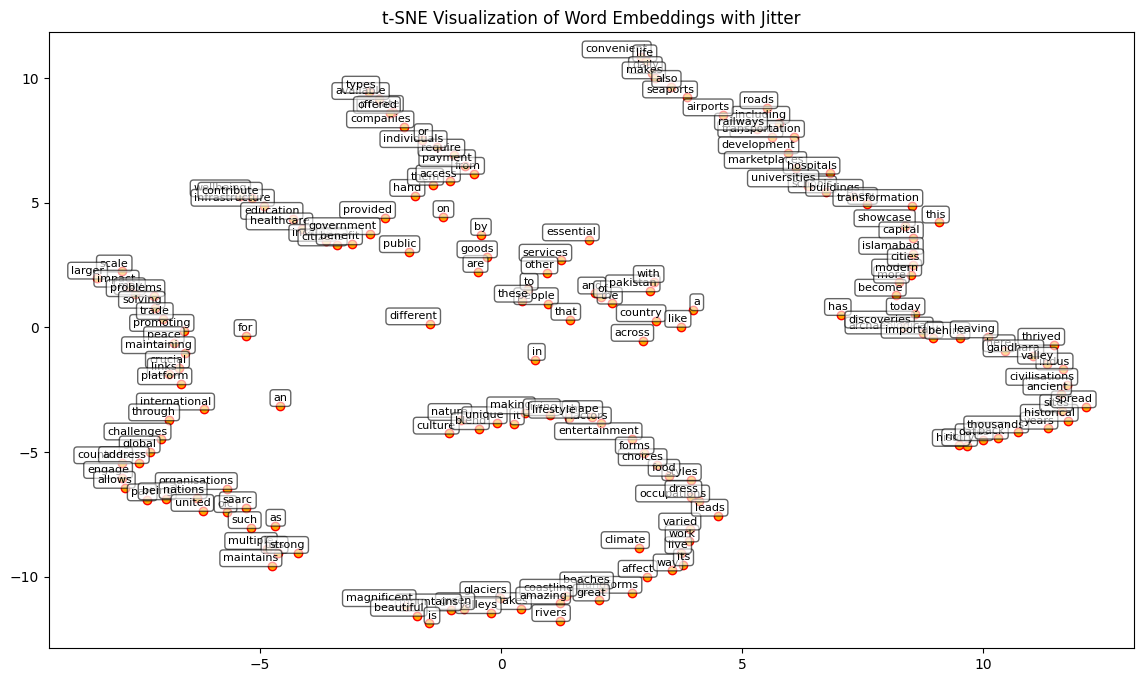

In [27]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

words = w2v_model.wv.index_to_key  # Get the word forms of the vocabulary
wvs = w2v_model.wv[words]  # Get embeddings of all word forms

# Apply TSNE with higher perplexity for more spread out clusters
tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=30)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

# Add random jitter to prevent overlapping points
jitter_strength = 0.05
T_jittered = T + np.random.normal(0, jitter_strength, T.shape)

# Plotting
plt.figure(figsize=(14, 8))
plt.scatter(T_jittered[:, 0], T_jittered[:, 1], c='orange', edgecolors='r')

# Add annotations for each point with some offset
for label, x, y in zip(labels, T_jittered[:, 0], T_jittered[:, 1]):
    plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),  # Offset position of the label
                 textcoords='offset points',
                 ha='right',  # Horizontal alignment of the label
                 va='bottom',  # Vertical alignment of the label
                 bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white', alpha=0.6),  # Add background to text
                 fontsize=8)  # Reduce font size for readability

# Zoom into the relevant region (optional, depending on your data distribution)
plt.xlim(min(T_jittered[:, 0]) - 1, max(T_jittered[:, 0]) + 1)
plt.ylim(min(T_jittered[:, 1]) - 1, max(T_jittered[:, 1]) + 1)

plt.title('t-SNE Visualization of Word Embeddings with Jitter')
plt.show()
